In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.shape

(614, 13)

In [9]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [10]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [11]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Target variable distribution
print("\n Target Distribution:")
print(df['Loan_Status'].value_counts(normalize=True))


 Target Distribution:
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


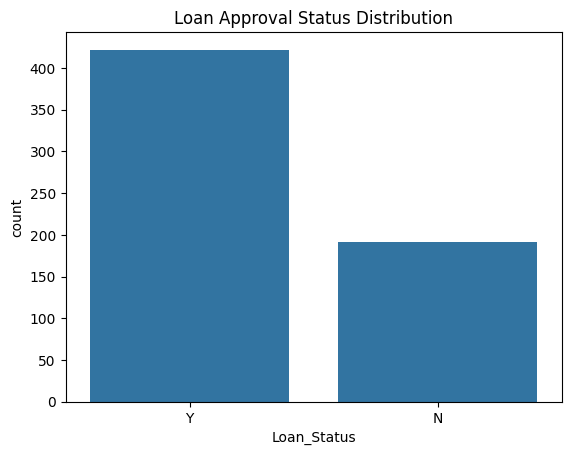

In [14]:
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Approval Status Distribution')
plt.show()

Preprocessing

In [15]:
# Fill categorical features with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Fill numerical features with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Drop Loan_ID as it's just a unique identifier
df.drop('Loan_ID', axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Binary categorical columns: Yes/No, Male/Female, Graduate/Not Graduate
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Replace '3+' in Dependents with 3 (convert to int)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# One-hot encode nominal feature: 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,False,True
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,False,False
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,False,True
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,False,True
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,False,True


Train Test Split

In [18]:
# Separate features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (491, 12)
Testing set shape: (123, 12)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\n📘 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\n🌳 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 4. Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n📈 SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


📘 Logistic Regression
Accuracy: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


🌳 Decision Tree
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        38
           1       0.82      0.79      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.69       123
weighted avg       0.74      0.73      0.73       123


🌲 Random Forest
Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                          

In [22]:
import joblib


🗳️ Hard Voting Classifier
Accuracy: 0.8455284552845529
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.85      0.94      0.89        85

    accuracy                           0.85       123
   macro avg       0.84      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123


🧠 Soft Voting Classifier
Accuracy: 0.8211382113821138
              precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123



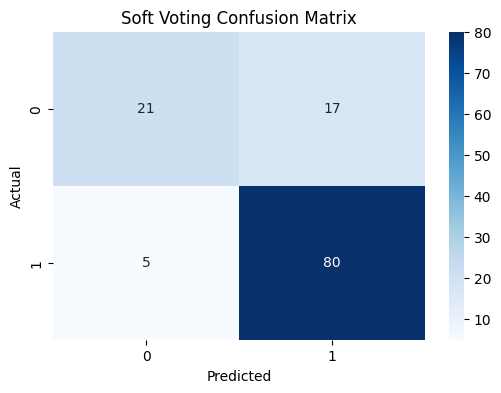

In [23]:
# Hard Voting (based on majority vote)
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svm', svm)],
    voting='hard'
)
selected_features = X.columns.tolist()
joblib.dump(selected_features, 'feature_list.pkl')
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print("\n🗳️ Hard Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))

# Soft Voting (based on predicted probabilities)
voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svm', svm)],
    voting='soft'
)
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("\n🧠 Soft Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))

# ------------------ Confusion Matrix ------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_soft), annot=True, fmt="d", cmap="Blues")
plt.title("Soft Voting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
import joblib

# Save the trained logistic regression model
joblib.dump(lr, 'loan_approval_model.pkl')

# Save your scaler and encoder if used (e.g., StandardScaler or OneHotEncoder)
joblib.dump(scaler, 'scaler.pkl')  # if used
# joblib.dump(encoder, 'encoder.pkl')  # Uncomment if you used encoding and want to save it

['scaler.pkl']

In [25]:
def predict_loan_approval(input_data):
    import numpy as np
    import joblib

    # Load the saved model and scaler
    model = joblib.load('loan_approval_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Input example: list or array with the same feature order as training
    # Example:


    # Create a DataFrame for input
    import pandas as pd
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Apply preprocessing (label encoding or one-hot if needed)
    for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
        input_df[col] = label_encoder[col].transform(input_df[col])  # use your stored encoders

    # Feature scaling
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)

    return "Loan Approved ✅" if prediction[0] == 1 else "Loan Rejected ❌"